In [1]:
# Basic Libraries
import numpy as np
import pandas as pd
import seaborn as sb
import matplotlib.pyplot as plt # we only need pyplot
sb.set() # set the default Seaborn style for graphics

In [54]:
housedata = pd.read_csv('train.csv')
housedata.head()

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,...,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice
0,1,60,RL,65.0,8450,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,2,2008,WD,Normal,208500
1,2,20,RL,80.0,9600,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,5,2007,WD,Normal,181500
2,3,60,RL,68.0,11250,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,9,2008,WD,Normal,223500
3,4,70,RL,60.0,9550,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,2,2006,WD,Abnorml,140000
4,5,60,RL,84.0,14260,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,12,2008,WD,Normal,250000


# 1

In [3]:
saleprice = pd.DataFrame(housedata['SalePrice'])
central = pd.DataFrame(housedata['CentralAir'])

### 1a

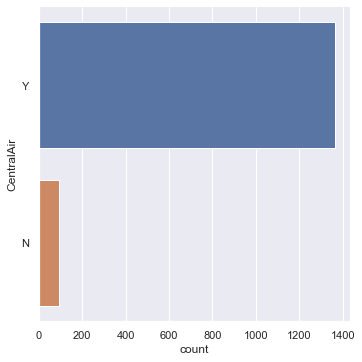

In [4]:
sb.catplot(y = "CentralAir", data = central, kind = "count")

In [5]:
central.value_counts()

CentralAir
Y             1365
N               95
dtype: int64

In [6]:
print("Ratio of Y:N = 1365:95")

Ratio of Y:N = 1365:95


### 1b

<AxesSubplot:xlabel='SalePrice', ylabel='CentralAir'>

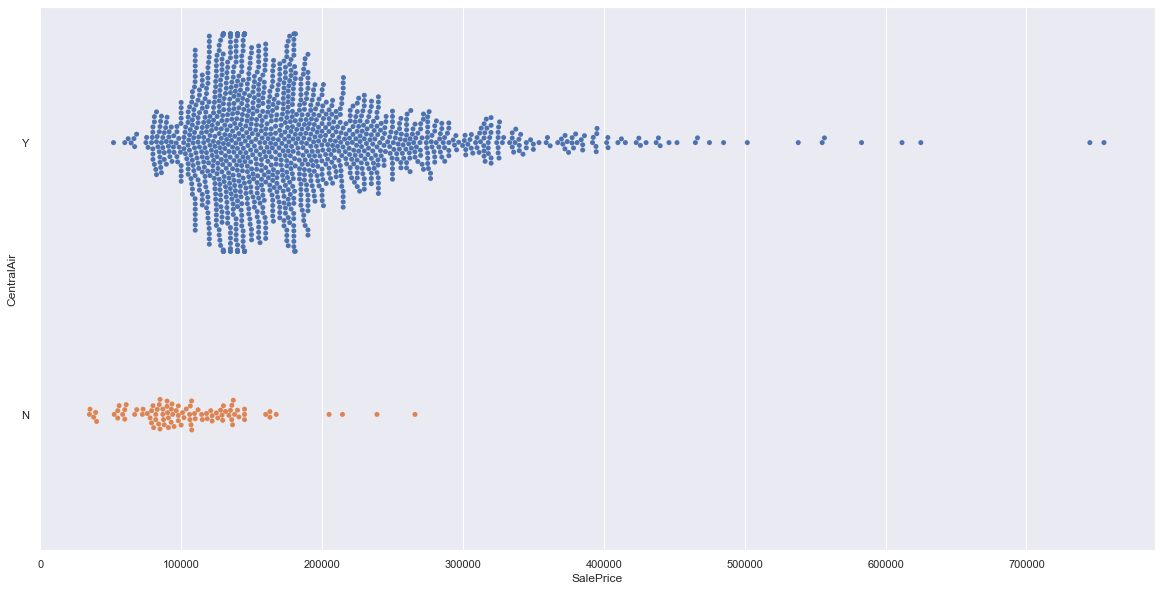

In [7]:
houseDF = pd.concat([saleprice, central], axis = 1).reindex(saleprice.index)

f = plt.figure(figsize=(20, 10))
sb.swarmplot(x = "SalePrice", y = "CentralAir", data = houseDF, orient = "h")

### 1c

In [8]:
from sklearn.tree import DecisionTreeClassifier

dectree = DecisionTreeClassifier(max_depth = 2)

### 1d

In [9]:
housedata = housedata.sample(frac = 1, replace = False)
trainset = housedata.iloc[:1100,:]
testset = housedata.iloc[1100:,:]

In [10]:
saletrain = pd.DataFrame(trainset['SalePrice'])
centraltrain = pd.DataFrame(trainset['CentralAir'])

saletest = pd.DataFrame(testset['SalePrice'])
centraltest = pd.DataFrame(testset['CentralAir'])

### 1e

In [11]:
dectree.fit(saletrain, centraltrain)

DecisionTreeClassifier(max_depth=2)

### 1f

[Text(334.8, 543.6, 'Total <= 107700.0\ngini = 0.122\nsamples = 1100\nvalue = [72, 1028]\nclass = Yes'),
 Text(167.4, 326.16, 'Total <= 74000.0\ngini = 0.467\nsamples = 116\nvalue = [43, 73]\nclass = Yes'),
 Text(83.7, 108.72000000000003, 'gini = 0.346\nsamples = 18\nvalue = [14, 4]\nclass = No'),
 Text(251.10000000000002, 108.72000000000003, 'gini = 0.417\nsamples = 98\nvalue = [29, 69]\nclass = Yes'),
 Text(502.20000000000005, 326.16, 'Total <= 137250.0\ngini = 0.057\nsamples = 984\nvalue = [29, 955]\nclass = Yes'),
 Text(418.5, 108.72000000000003, 'gini = 0.159\nsamples = 230\nvalue = [20, 210]\nclass = Yes'),
 Text(585.9, 108.72000000000003, 'gini = 0.024\nsamples = 754\nvalue = [9, 745]\nclass = Yes')]

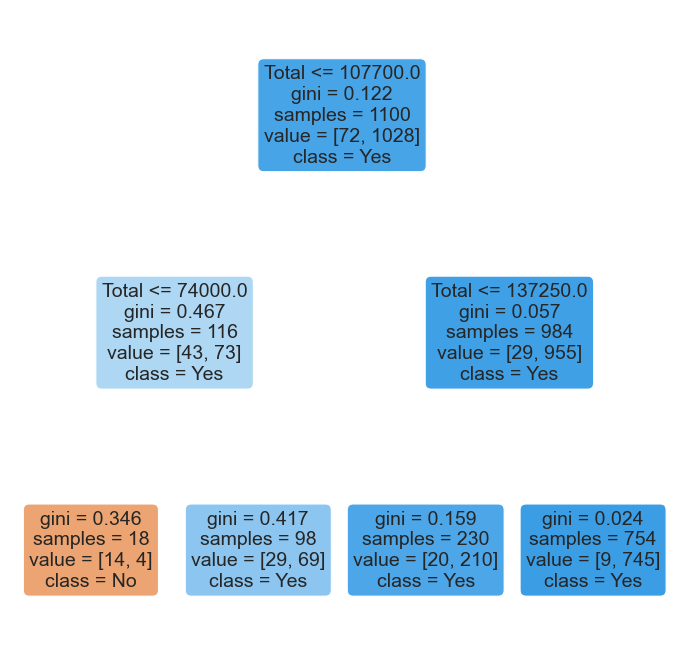

In [12]:
from sklearn.tree import plot_tree

f = plt.figure(figsize=(12,12))
plot_tree(dectree, filled=True, rounded=True, 
          feature_names=["Total"], 
          class_names=["No","Yes"])

### 1g

In [13]:
central_train_pred = dectree.predict(saletrain)

<AxesSubplot:>

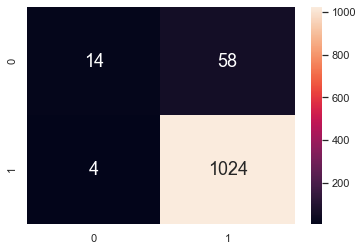

In [14]:
from sklearn.metrics import confusion_matrix
sb.heatmap(confusion_matrix(centraltrain, central_train_pred), 
           annot = True, fmt=".0f", annot_kws={"size": 18})

### 1h

In [15]:
from sklearn import metrics
confusiontrain = metrics.confusion_matrix(centraltrain, central_train_pred)
#[row, column]
TTP = confusiontrain[1, 1]
TTN = confusiontrain[0, 0]
TFP = confusiontrain[0, 1]
TFN = confusiontrain[1, 0]

In [16]:
print("Classification Accuracy\t:", dectree.score(saletrain, centraltrain))
print("True Positive Rate \t:", TTP/(TTP+TFN))
print("True Negative Rate \t:", TTN/(TTN+TFP))
print("False Positive Rate \t:", TFP/(TFP+TTN))
print("False Negative Rate \t:", TFN/(TFN+TTP))

Classification Accuracy	: 0.9436363636363636
True Positive Rate 	: 0.9961089494163424
True Negative Rate 	: 0.19444444444444445
False Positive Rate 	: 0.8055555555555556
False Negative Rate 	: 0.0038910505836575876


### 1i

In [17]:
central_test_pred = dectree.predict(saletest)

<AxesSubplot:>

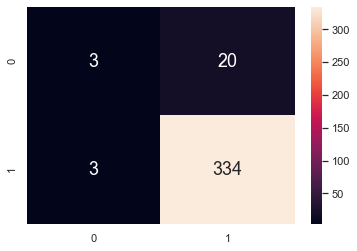

In [18]:
sb.heatmap(confusion_matrix(centraltest, central_test_pred), 
           annot = True, fmt=".0f", annot_kws={"size": 18})

### 1j

In [19]:
confusiontest = metrics.confusion_matrix(centraltest, central_test_pred)
#[row, column]
TP = confusiontest[1, 1]
TN = confusiontest[0, 0]
FP = confusiontest[0, 1]
FN = confusiontest[1, 0]

In [20]:
print("Classification Accuracy\t:", dectree.score(saletest, centraltest))
print("True Positive Rate \t:", TP/(TP+FN))
print("True Negative Rate \t:", TN/(TN+FP))
print("False Positive Rate \t:", FP/(FP+TN))
print("False Negative Rate \t:", FN/(FN+TP))

Classification Accuracy	: 0.9361111111111111
True Positive Rate 	: 0.9910979228486647
True Negative Rate 	: 0.13043478260869565
False Positive Rate 	: 0.8695652173913043
False Negative Rate 	: 0.008902077151335312


# 2 GrLivArea

### a

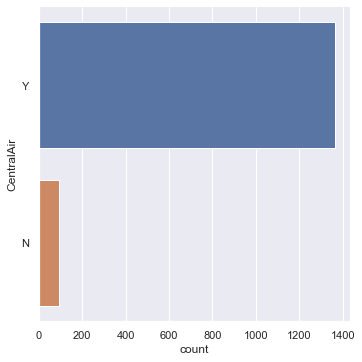

In [21]:
grlivarea = pd.DataFrame(housedata['GrLivArea'])
sb.catplot(y = "CentralAir", data = central, kind = "count")

In [22]:
print(central.value_counts())

CentralAir
Y             1365
N               95
dtype: int64


In [23]:
print("Ratio of Y:N = 1365:95")

Ratio of Y:N = 1365:95


### b

<AxesSubplot:xlabel='GrLivArea', ylabel='CentralAir'>

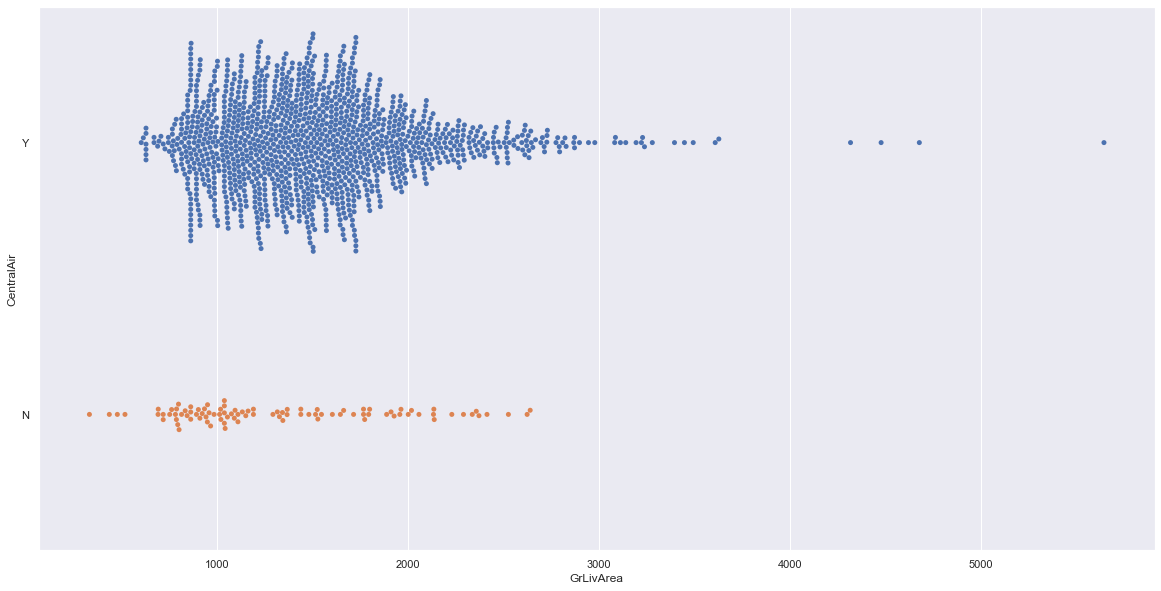

In [24]:
grlivDF = pd.concat([grlivarea, central], axis = 1).reindex(grlivarea.index)

f = plt.figure(figsize=(20, 10))
sb.swarmplot(x = "GrLivArea", y = "CentralAir", data = grlivDF, orient = "h")

### d

In [25]:
grtrain = pd.DataFrame(trainset['GrLivArea'])
grtest = pd.DataFrame(testset['GrLivArea'])

### e

In [26]:
dectree.fit(grtrain, centraltrain)

DecisionTreeClassifier(max_depth=2)

### f

[Text(334.8, 543.6, 'Total <= 800.0\ngini = 0.122\nsamples = 1100\nvalue = [72, 1028]\nclass = Yes'),
 Text(167.4, 326.16, 'Total <= 542.5\ngini = 0.415\nsamples = 34\nvalue = [10, 24]\nclass = Yes'),
 Text(83.7, 108.72000000000003, 'gini = 0.0\nsamples = 2\nvalue = [2, 0]\nclass = No'),
 Text(251.10000000000002, 108.72000000000003, 'gini = 0.375\nsamples = 32\nvalue = [8, 24]\nclass = Yes'),
 Text(502.20000000000005, 326.16, 'Total <= 1193.0\ngini = 0.11\nsamples = 1066\nvalue = [62, 1004]\nclass = Yes'),
 Text(418.5, 108.72000000000003, 'gini = 0.191\nsamples = 290\nvalue = [31, 259]\nclass = Yes'),
 Text(585.9, 108.72000000000003, 'gini = 0.077\nsamples = 776\nvalue = [31, 745]\nclass = Yes')]

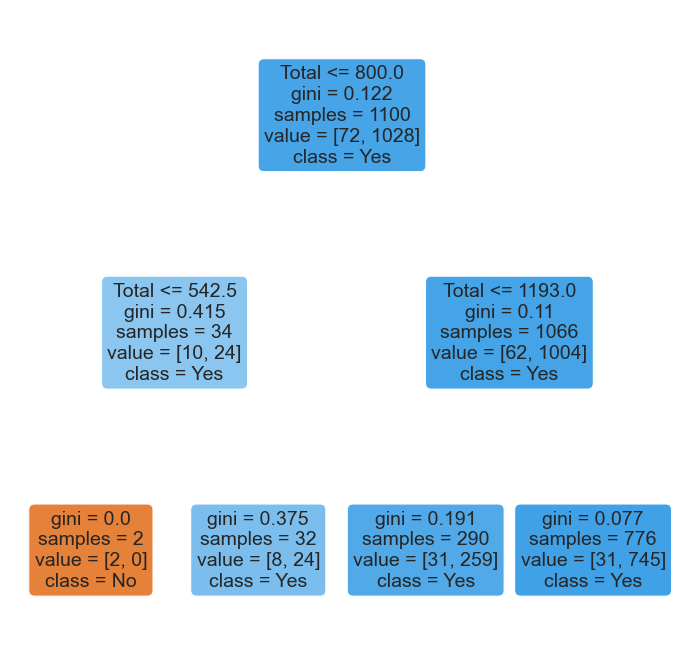

In [27]:
f = plt.figure(figsize=(12,12))
plot_tree(dectree, filled=True, rounded=True, 
          feature_names=["Total"], 
          class_names=["No","Yes"])

### g

<AxesSubplot:>

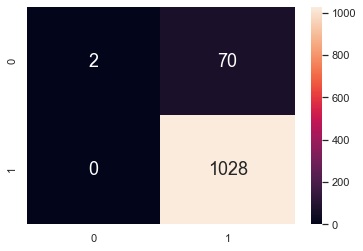

In [28]:
centralgr_train_pred = dectree.predict(grtrain)
sb.heatmap(confusion_matrix(centraltrain, centralgr_train_pred), 
           annot = True, fmt=".0f", annot_kws={"size": 18})

### h

In [29]:
confusiontrain2 = metrics.confusion_matrix(centraltrain, centralgr_train_pred)
#[row, column]
TTP2 = confusiontrain2[1, 1]
TTN2 = confusiontrain2[0, 0]
TFP2 = confusiontrain2[0, 1]
TFN2 = confusiontrain2[1, 0]

print("Classification Accuracy\t:", dectree.score(grtrain, centraltrain))
print("True Positive Rate \t:", TTP2/(TTP2+TFN2))
print("True Negative Rate \t:", TTN2/(TTN2+TFP2))
print("False Positive Rate \t:", TFP2/(TFP2+TTN2))
print("False Negative Rate \t:", TFN2/(TFN2+TTP2))

Classification Accuracy	: 0.9363636363636364
True Positive Rate 	: 1.0
True Negative Rate 	: 0.027777777777777776
False Positive Rate 	: 0.9722222222222222
False Negative Rate 	: 0.0


### i

<AxesSubplot:>

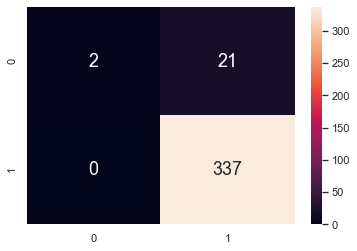

In [30]:
centralgr_test_pred = dectree.predict(grtest)

sb.heatmap(confusion_matrix(centraltest, centralgr_test_pred), 
           annot = True, fmt=".0f", annot_kws={"size": 18})

### j

In [31]:
confusiontest2 = metrics.confusion_matrix(centraltest, centralgr_test_pred)
#[row, column]
TP2 = confusiontest2[1, 1]
TN2 = confusiontest2[0, 0]
FP2 = confusiontest2[0, 1]
FN2 = confusiontest2[1, 0]

print("Classification Accuracy\t:", dectree.score(grtest, centraltest))
print("True Positive Rate \t:", TP2/(TP2+FN2))
print("True Negative Rate \t:", TN2/(TN2+FP2))
print("False Positive Rate \t:", FP2/(FP2+TN2))
print("False Negative Rate \t:", FN2/(FN2+TP2))

Classification Accuracy	: 0.9416666666666667
True Positive Rate 	: 1.0
True Negative Rate 	: 0.08695652173913043
False Positive Rate 	: 0.9130434782608695
False Negative Rate 	: 0.0


# 2 OverallQual

### a

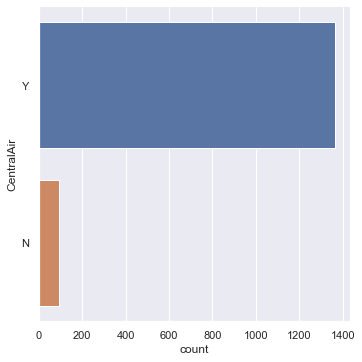

In [32]:
overallqual = pd.DataFrame(housedata['OverallQual'])
sb.catplot(y = "CentralAir", data = central, kind = "count")

In [33]:
central.value_counts()

CentralAir
Y             1365
N               95
dtype: int64

In [34]:
print("Ratio of Y:N = 1365:95")

Ratio of Y:N = 1365:95


### b

<AxesSubplot:xlabel='OverallQual', ylabel='CentralAir'>

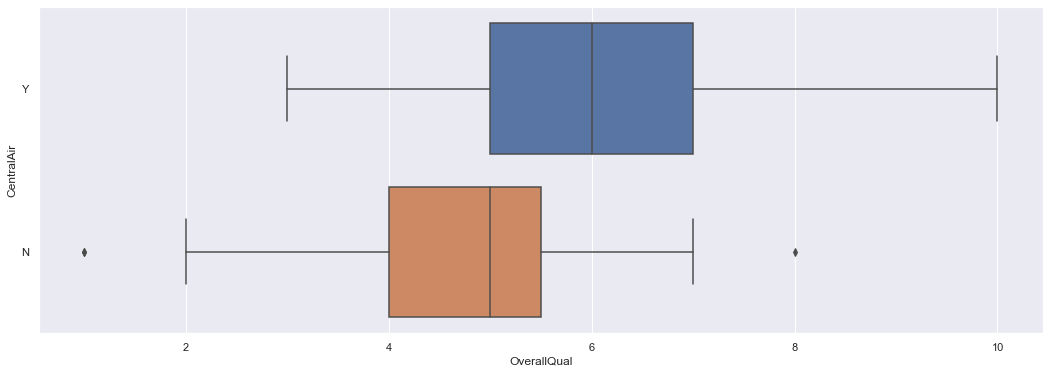

In [35]:
overallDF = pd.concat([overallqual, central], axis = 1).reindex(overallqual.index)

f = plt.figure(figsize=(18, 6))
sb.boxplot(x = "OverallQual", y = "CentralAir", data = overallDF, orient = "h")

### d

In [36]:
ovtrain = pd.DataFrame(trainset['OverallQual'])
ovtest = pd.DataFrame(testset['OverallQual'])

### e

In [37]:
dectree.fit(ovtrain, centraltrain)

DecisionTreeClassifier(max_depth=2)

### f

[Text(334.8, 543.6, 'Total <= 3.5\ngini = 0.122\nsamples = 1100\nvalue = [72, 1028]\nclass = Yes'),
 Text(167.4, 326.16, 'Total <= 2.5\ngini = 0.472\nsamples = 21\nvalue = [13, 8]\nclass = No'),
 Text(83.7, 108.72000000000003, 'gini = 0.0\nsamples = 3\nvalue = [3, 0]\nclass = No'),
 Text(251.10000000000002, 108.72000000000003, 'gini = 0.494\nsamples = 18\nvalue = [10, 8]\nclass = No'),
 Text(502.20000000000005, 326.16, 'Total <= 4.5\ngini = 0.103\nsamples = 1079\nvalue = [59, 1020]\nclass = Yes'),
 Text(418.5, 108.72000000000003, 'gini = 0.306\nsamples = 90\nvalue = [17, 73]\nclass = Yes'),
 Text(585.9, 108.72000000000003, 'gini = 0.081\nsamples = 989\nvalue = [42, 947]\nclass = Yes')]

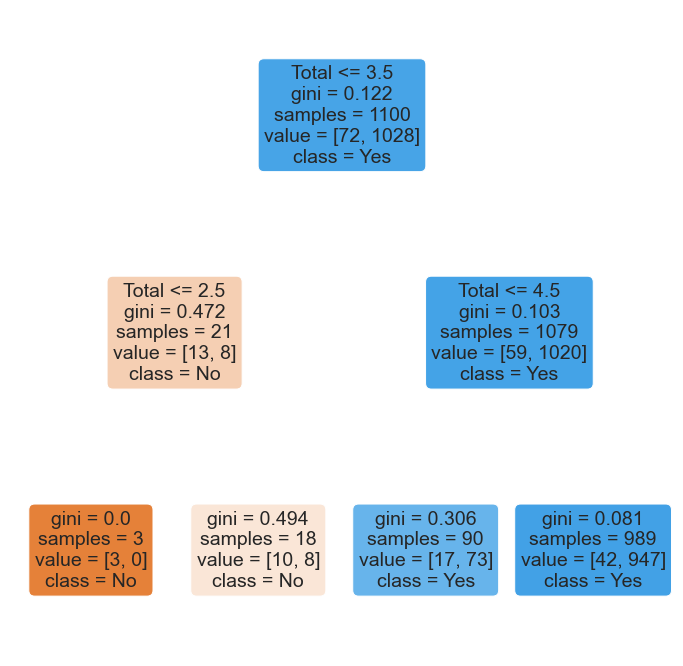

In [38]:
f = plt.figure(figsize=(12,12))
plot_tree(dectree, filled=True, rounded=True, 
          feature_names=["Total"], 
          class_names=["No","Yes"])

### g

<AxesSubplot:>

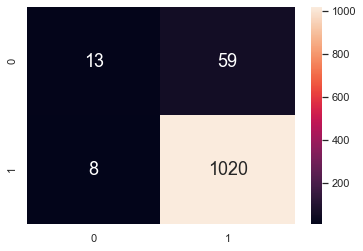

In [39]:
centralov_train_pred = dectree.predict(ovtrain)
sb.heatmap(confusion_matrix(centraltrain, centralov_train_pred), 
           annot = True, fmt=".0f", annot_kws={"size": 18})

### h

In [40]:
confusiontrain3 = metrics.confusion_matrix(centraltrain, centralov_train_pred)
#[row, column]
TTP3 = confusiontrain3[1, 1]
TTN3 = confusiontrain3[0, 0]
TFP3 = confusiontrain3[0, 1]
TFN3 = confusiontrain3[1, 0]

print("Classification Accuracy\t:", dectree.score(ovtrain, centraltrain))
print("True Positive Rate \t:", TTP3/(TTP3+TFN3))
print("True Negative Rate \t:", TTN3/(TTN3+TFP3))
print("False Positive Rate \t:", TFP3/(TFP3+TTN3))
print("False Negative Rate \t:", TFN3/(TFN3+TTP3))

Classification Accuracy	: 0.9390909090909091
True Positive Rate 	: 0.9922178988326849
True Negative Rate 	: 0.18055555555555555
False Positive Rate 	: 0.8194444444444444
False Negative Rate 	: 0.007782101167315175


### i

<AxesSubplot:>

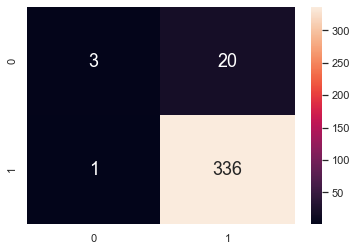

In [41]:
centralov_test_pred = dectree.predict(ovtest)

sb.heatmap(confusion_matrix(centraltest, centralov_test_pred), 
           annot = True, fmt=".0f", annot_kws={"size": 18})

### j

In [42]:
confusiontest3 = metrics.confusion_matrix(centraltest, centralov_test_pred)
#[row, column]
TP3 = confusiontest3[1, 1]
TN3 = confusiontest3[0, 0]
FP3 = confusiontest3[0, 1]
FN3 = confusiontest3[1, 0]

print("Classification Accuracy\t:", dectree.score(ovtest, centraltest))
print("True Positive Rate \t:", TP3/(TP3+FN3))
print("True Negative Rate \t:", TN3/(TN3+FP3))
print("False Positive Rate \t:", FP3/(FP3+TN3))
print("False Negative Rate \t:", FN3/(FN3+TP3))

Classification Accuracy	: 0.9416666666666667
True Positive Rate 	: 0.9970326409495549
True Negative Rate 	: 0.13043478260869565
False Positive Rate 	: 0.8695652173913043
False Negative Rate 	: 0.002967359050445104


# 2 YearBuilt

### a

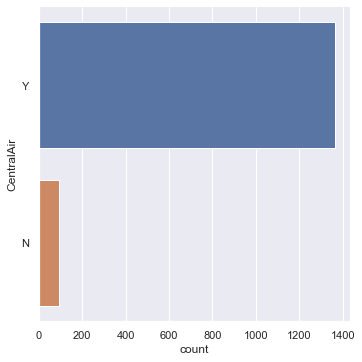

In [43]:
yearbuilt = pd.DataFrame(housedata['YearBuilt'])
sb.catplot(y = "CentralAir", data = central, kind = "count")

In [44]:
central.value_counts()

CentralAir
Y             1365
N               95
dtype: int64

In [45]:
print("Ratio of Y:N = 1365:95")

Ratio of Y:N = 1365:95


### b

<AxesSubplot:xlabel='YearBuilt', ylabel='CentralAir'>

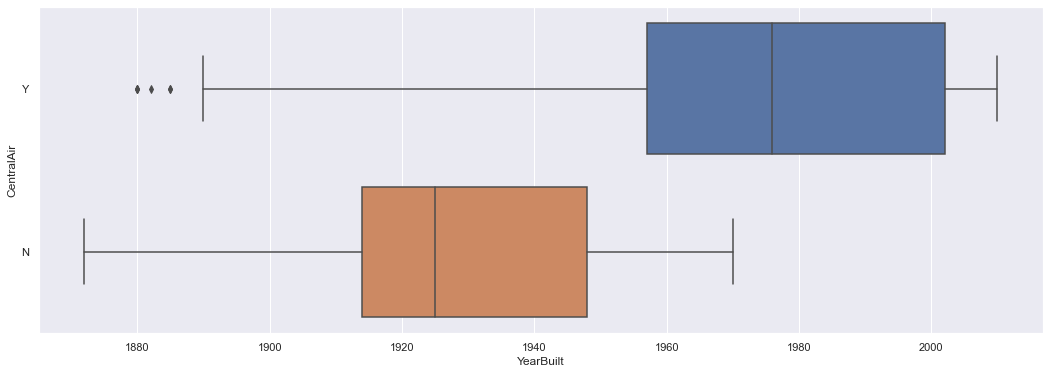

In [46]:
yearDF = pd.concat([yearbuilt, central], axis = 1).reindex(yearbuilt.index)

f = plt.figure(figsize=(18, 6))
sb.boxplot(x = "YearBuilt", y = "CentralAir", data = yearDF, orient = "h")

### d

In [47]:
ybtrain = pd.DataFrame(trainset['YearBuilt'])
ybtest = pd.DataFrame(testset['YearBuilt'])

### e

In [48]:
dectree.fit(ybtrain, centraltrain)

DecisionTreeClassifier(max_depth=2)

### f

[Text(334.8, 543.6, 'Total <= 1925.5\ngini = 0.122\nsamples = 1100\nvalue = [72, 1028]\nclass = Yes'),
 Text(167.4, 326.16, 'Total <= 1917.5\ngini = 0.456\nsamples = 122\nvalue = [43, 79]\nclass = Yes'),
 Text(83.7, 108.72000000000003, 'gini = 0.5\nsamples = 57\nvalue = [28, 29]\nclass = Yes'),
 Text(251.10000000000002, 108.72000000000003, 'gini = 0.355\nsamples = 65\nvalue = [15, 50]\nclass = Yes'),
 Text(502.20000000000005, 326.16, 'Total <= 1955.5\ngini = 0.058\nsamples = 978\nvalue = [29, 949]\nclass = Yes'),
 Text(418.5, 108.72000000000003, 'gini = 0.231\nsamples = 180\nvalue = [24, 156]\nclass = Yes'),
 Text(585.9, 108.72000000000003, 'gini = 0.012\nsamples = 798\nvalue = [5, 793]\nclass = Yes')]

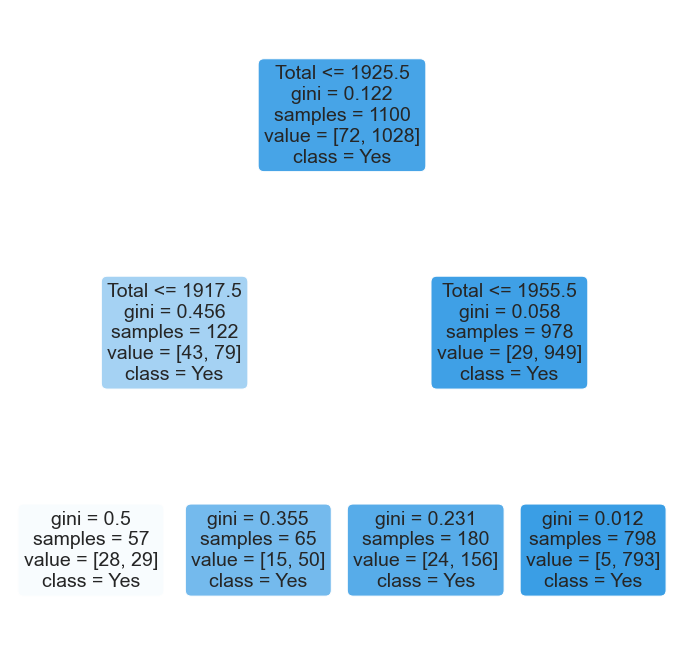

In [49]:
f = plt.figure(figsize=(12,12))
plot_tree(dectree, filled=True, rounded=True, 
          feature_names=["Total"], 
          class_names=["No","Yes"])

### g

<AxesSubplot:>

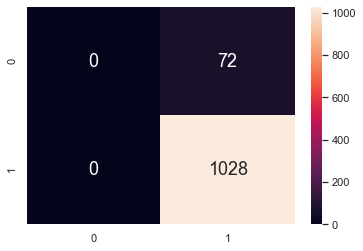

In [50]:
centralyb_train_pred = dectree.predict(ybtrain)
sb.heatmap(confusion_matrix(centraltrain, centralyb_train_pred), 
           annot = True, fmt=".0f", annot_kws={"size": 18})

### h

In [51]:
confusiontrain4 = metrics.confusion_matrix(centraltrain, centralyb_train_pred)
#[row, column]
TTP4 = confusiontrain4[1, 1]
TTN4 = confusiontrain4[0, 0]
TFP4 = confusiontrain4[0, 1]
TFN4 = confusiontrain4[1, 0]

print("Classification Accuracy\t:", dectree.score(ybtrain, centraltrain))
print("True Positive Rate \t:", TTP4/(TTP4+TFN4))
print("True Negative Rate \t:", TTN4/(TTN4+TFP4))
print("False Positive Rate \t:", TFP4/(TFP4+TTN4))
print("False Negative Rate \t:", TFN4/(TFN4+TTP4))

Classification Accuracy	: 0.9345454545454546
True Positive Rate 	: 1.0
True Negative Rate 	: 0.0
False Positive Rate 	: 1.0
False Negative Rate 	: 0.0


### i

<AxesSubplot:>

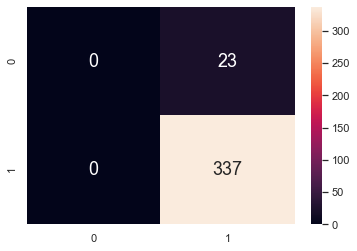

In [52]:
centralyb_test_pred = dectree.predict(ybtest)

sb.heatmap(confusion_matrix(centraltest, centralyb_test_pred), 
           annot = True, fmt=".0f", annot_kws={"size": 18})

### j

In [55]:
confusiontest4 = metrics.confusion_matrix(centraltest, centralyb_test_pred)
#[row, column]
TP4 = confusiontest4[1, 1]
TN4 = confusiontest4[0, 0]
FP4 = confusiontest4[0, 1]
FN4 = confusiontest4[1, 0]

print("Classification Accuracy\t:", dectree.score(ybtest, centraltest))
print("True Positive Rate \t:", TP4/(TP4+FN4))
print("True Negative Rate \t:", TN4/(TN4+FP4))
print("False Positive Rate \t:", FP4/(FP4+TN4))
print("False Negative Rate \t:", FN4/(FN4+TP4))

Classification Accuracy	: 0.9361111111111111
True Positive Rate 	: 1.0
True Negative Rate 	: 0.0
False Positive Rate 	: 1.0
False Negative Rate 	: 0.0


# 3

### Train Set

#### SalePrice

Classification Accuracy	: 0.9436363636363636

True Positive Rate 	: 0.9961089494163424

False Positive Rate 	: 0.8055555555555556


#### GrLivArea

Classification Accuracy	: 0.9363636363636364

True Positive Rate 	: 1.0

False Positive Rate 	: 0.9722222222222222


#### OverallQual

Classification Accuracy	: 0.9390909090909091

True Positive Rate 	: 0.9922178988326849

False Positive Rate 	: 0.8194444444444444


#### YearBuilt

Classification Accuracy	: 0.9345454545454546

True Positive Rate 	: 1.0

False Positive Rate 	: 1.0

### Test Set

#### SalePrice

Classification Accuracy	: 0.9361111111111111

True Positive Rate 	: 0.9910979228486647

False Positive Rate 	: 0.8695652173913043


#### GrLivArea

Classification Accuracy	: 0.9416666666666667

True Positive Rate 	: 1.0

False Positive Rate 	: 0.9130434782608695


#### OverallQual

Classification Accuracy	: 0.9416666666666667

True Positive Rate 	: 0.9970326409495549

False Positive Rate 	: 0.8695652173913043


#### YearBuilt

Classification Accuracy	: 0.9361111111111111

True Positive Rate 	: 1.0

False Positive Rate 	: 1.0

Classification Accuracy and True Positive Rate is important in predicting "CentralAir". Since "OverallQual" has the second highest Classification Accuracy in Train data (0.9390909090909091) and the highest in Test data (0.9416666666666667), it also has the highest True Positive Rate in Train data (1.0) and high True Positive Rate (0.9970326409495549) close to 1.

Classification Accuracy allows us to predict accurately whether the house has "CentralAir" (central air-conditioning in the house). Having a higher Classification Accuracy will allow us to know from "OverallQual" that the house has central air-conditioning. The True Positive Rate also let's us know definitively that the house has central air-conditioning which is what we want. We are not interested in False Positive Rate as we want to know which houses have central air-conditioning. Therefore "OverallQual" is most suited to predict "CentralAir".